In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from data_wrangling import read_cancer_data, nhs_code_link, select_month, select_org, help_with, select_cancer, select_standard

In [79]:
data = read_cancer_data()

In [5]:
link_data = nhs_code_link()
overlap = list(set(data['ORG CODE']) & set(link_data['ORG CODE']))
#unmatched = data[~data['ORG CODE'].astype(str).isin(link_data['ORG CODE'].astype(str))]

<AxesSubplot:xlabel='PERIOD', ylabel='BREACHES'>

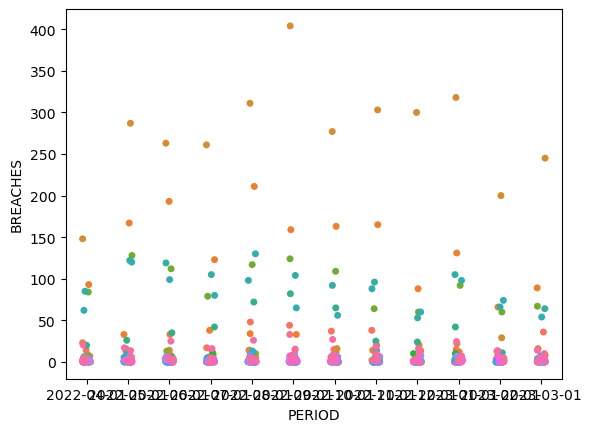

In [10]:
#plt.figure(figsize=[10,10])
sns.stripplot(x='PERIOD', y = 'BREACHES', data=select_org(df=data,org_str='R1K'), hue = 'CANCER TYPE', legend=False)

<AxesSubplot:xlabel='PERIOD', ylabel='BREACHES'>

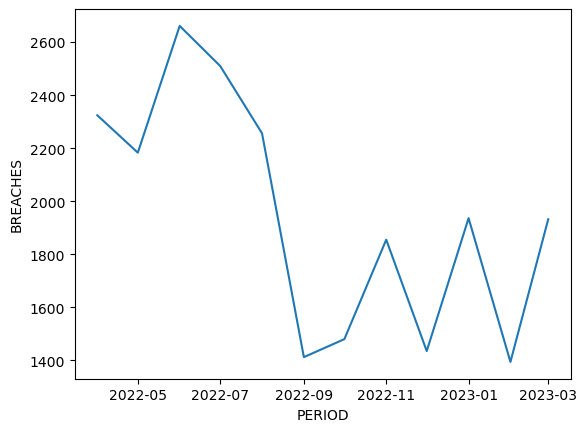

In [33]:
sns.lineplot(x='PERIOD', y='BREACHES', data=select_org(data,'R0A').groupby(by='PERIOD').sum())

In [65]:
data.STANDARD.unique()

array(['28-day FDS', '31-day Combined', '62-day Combined'], dtype=object)

In [ ]:
select_standard

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [120]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sample data (replace this with your actual data)

df = select_cancer(select_standard(select_org(data, 'R1K'),'FDS'),3)

# Calculate the proportion of breaches
df['PROPORTION_BREACHES'] = df['BREACHES'] / df['TOTAL']

# Create a sliding window to calculate the moving average of the proportion of breaches
window_size = 3  # Adjust the window size as needed
df['MOVING_AVERAGE'] = df['PROPORTION_BREACHES'].rolling(window=window_size).mean()

# Plot the interactive graph
fig = go.Figure()

# Add a scatter plot for the proportion of breaches
fig.add_trace(go.Scatter(x=df['PERIOD'], y=df['PROPORTION_BREACHES'], mode='lines+markers', name='Proportion of Breaches'))

# Add a line plot for the moving average
fig.add_trace(go.Scatter(x=df['PERIOD'], y=df['MOVING_AVERAGE'], mode='lines', name=f'Moving Average (Window={window_size})'))

# Customize the layout
fig.update_layout(title='Proportion of Breaches Over Time',
                  xaxis_title='Period',
                  yaxis_title='Proportion of Breaches',
                  hovermode='x',
                  xaxis=dict(tickmode='linear'),
                  updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])])

# Create animation frames
frames = [go.Frame(data=[go.Scatter(x=df['PERIOD'].iloc[:i + 1],
                                    y=df['MOVING_AVERAGE'].iloc[:i + 1],
                                    mode='lines',
                                    marker=dict(color='red'),
                                    name=f'Moving Average (Window={window_size})')]) for i in range(len(df))]

# Add frames to the figure
fig.frames = frames

# Show the interactive plot
fig.show()


Selected Suspected gynaecological cancer


In [12]:
#//ToDo: write a function to fliter out only singificant breaches/ significant number of cases pe trust etc
# Create a report generating script, where a figure is plotted using the trust name from the link file using the org code